## EMPLOYEE PERFORMANCE ANALYSIS PROJECT (INX Future Inc.)

## INTRODUCTION
The employee performance analysis project of INX Future Inc. is carried out with the main object of gaining actionable insights for the current employee data of the enterprise and find the causes of employee performance issues faced by the company.

## DATASET INFORMATION
The employee performance date of INX Future Inc. was accessed with the following link provided by IABAC:
http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls

The provide dataset included 28 columns(variables) and 1200 rows(data points)
Out of the 28 variables, 27 are predictor variables and one is the target variable

The predictor variables provided are:

       'Age','Gender', 'Education background', 'Marital status',
       'Employee department', 'Employee job role', 'Business Travel Frequency',
       'Distance from home', 'Employee education level', 'Employee environment satisfaction',
       'Employee hourly rate', 'Employee job involvement', 'Employee job level',
       'Employee job satisfaction', 'Number of companies Worked', 'OverTime',
       'Employee last salary hike percent', 'Employee relationship satisfaction',
       'Total work experience in years', 'Training times last year',
       'Employee work life balance', 'Experience years at this company',
       'Experience years in current role', 'Years since last promotion',
       'Years With current manager' 'Attrition'

The target variable is:
       
       'Performance rating'
        

## STEP 1: 
### Importing necessary libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import RandomizedSearchCV
import joblib

## STEP 2: 
### Loading the dataset

In [2]:
pwd

'C:\\Users\\arshad'

In [3]:
cd "C:\Users\arshad\Downloads"

C:\Users\arshad\Downloads


In [4]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

## STEP 3: 
### Exploratory data analysis

In [5]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


#### 3.1:Checking metadata

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


#### 3.2: Checking null values

In [9]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

#### 3.3: Analysing department wise employee performance

In [10]:
department_wise_data=data[['EmpDepartment','PerformanceRating']]

In [11]:
department_wise_data.head()

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3


In [12]:
department_wise_data['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [13]:
department_wise_performances=[]
for i in department_wise_data['EmpDepartment'].unique():
    print('The mean perfomance rating in',
          i,
          'department is',
          department_wise_data[department_wise_data['EmpDepartment']==i]['PerformanceRating'].mean())
    department_wise_performances.append(
        department_wise_data[department_wise_data['EmpDepartment']==i]['PerformanceRating'].mean())

The mean perfomance rating in Sales department is 2.8605898123324396
The mean perfomance rating in Human Resources department is 2.925925925925926
The mean perfomance rating in Development department is 3.085872576177285
The mean perfomance rating in Data Science department is 3.05
The mean perfomance rating in Research & Development department is 2.9212827988338192
The mean perfomance rating in Finance department is 2.7755102040816326


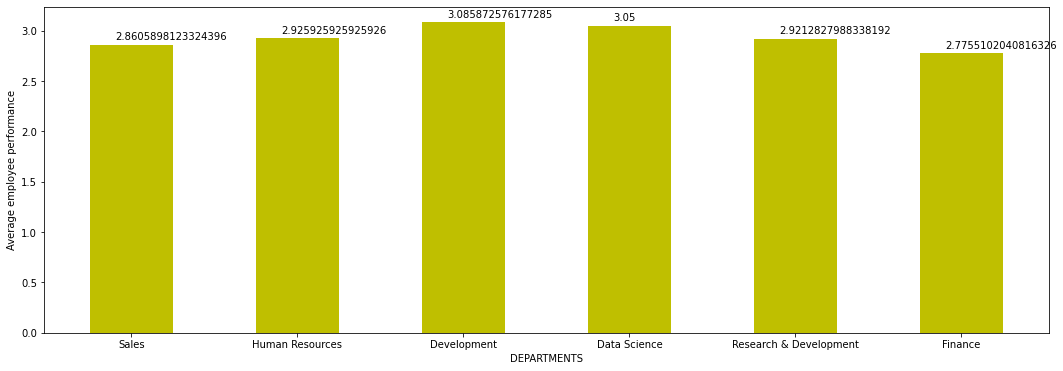

In [40]:
plt.figure(figsize=(18,6))
plt.bar(department_wise_data['EmpDepartment'].unique(),department_wise_performances,width=0.5,color='y',)
plt.xlabel('DEPARTMENTS')
plt.ylabel('Average employee performance')
for i,v in enumerate(department_wise_performances):
    plt.text(i-0.1,v+0.05,str(v))

#### Results of Department wise employee performance anlysis:
As obvious from the above barchart, the Development department has the highest average employee performance followed by Data science department. The rest of the deparments has more or less the same employee performance

#### 3.4: Checking feature importances

In [15]:
data.drop('EmpNumber',axis=1,inplace=True) # employee number is irrelevant as a predictor variable, so it can be eliminated

In [16]:
# ENCODING CATEGORICAL VARIABLES
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [17]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[[i]])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1200 non-null   int64  
 1   Gender                        1200 non-null   float64
 2   EducationBackground           1200 non-null   float64
 3   MaritalStatus                 1200 non-null   float64
 4   EmpDepartment                 1200 non-null   float64
 5   EmpJobRole                    1200 non-null   float64
 6   BusinessTravelFrequency       1200 non-null   float64
 7   DistanceFromHome              1200 non-null   int64  
 8   EmpEducationLevel             1200 non-null   int64  
 9   EmpEnvironmentSatisfaction    1200 non-null   int64  
 10  EmpHourlyRate                 1200 non-null   int64  
 11  EmpJobInvolvement             1200 non-null   int64  
 12  EmpJobLevel                   1200 non-null   int64  
 13  Emp

In [19]:
# SPLITTING TARGET AND PREDICTOR VARIABLES
x=data.iloc[:,:26]
y=data.iloc[:,26]

In [20]:
x.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1.0,2.0,2.0,5.0,13.0,2.0,10,3,4,...,12,4,10,2,2,10,7,0,8,0.0
1,47,1.0,2.0,2.0,5.0,13.0,2.0,14,4,4,...,12,4,20,2,3,7,7,1,7,0.0
2,40,1.0,1.0,1.0,5.0,13.0,1.0,5,4,4,...,21,3,20,2,3,18,13,1,12,0.0
3,41,1.0,0.0,0.0,3.0,8.0,2.0,10,4,2,...,15,2,23,2,2,21,6,12,6,0.0
4,60,1.0,2.0,2.0,5.0,13.0,2.0,16,4,1,...,14,4,10,1,3,2,2,2,2,0.0


In [21]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [22]:
tester=SelectKBest(score_func=chi2,k='all')
fit=tester.fit(x,y)

In [23]:
fit.scores_

array([5.17031262e+00, 6.45010450e-02, 1.51940780e-01, 1.23201098e+00,
       4.67870100e+01, 3.58961669e+01, 1.01136368e+00, 1.86500100e+01,
       3.14038417e-01, 1.10691319e+02, 1.78697363e+01, 2.22075746e-01,
       6.27026259e+00, 1.08309855e-01, 1.20835872e+00, 7.96352956e+00,
       2.97136917e+02, 3.58014315e-01, 4.15930372e+01, 4.07105760e-01,
       3.87650557e+00, 1.33602068e+02, 1.20860036e+02, 2.38004284e+02,
       8.74834710e+01, 2.18630453e+00])

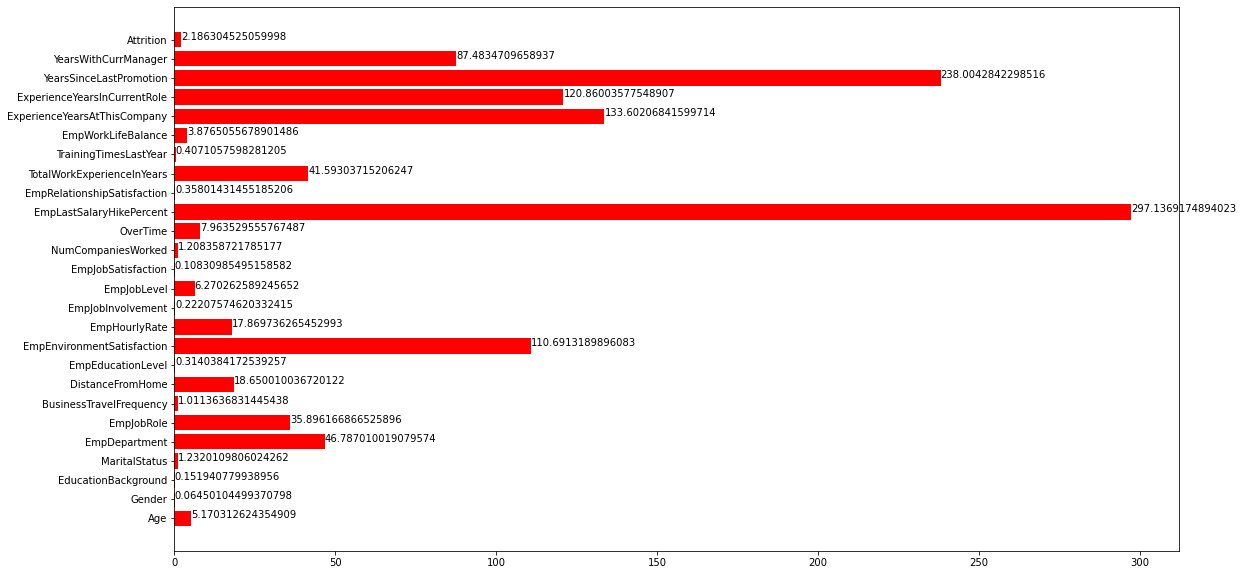

In [24]:
plt.figure(figsize=(18,10))
plt.barh(x.columns, fit.scores_,color='r')
for i,v in enumerate(fit.scores_):
    plt.text(v,i,str(v))

#### 3.5: Comparing high and low performance employees
The high performance employees(performance rating=4) and low performance employees(performance rating=2) are compared using the top 6 factors influencing the employee performance rate

In [25]:
good_employees=data[data['PerformanceRating']==4]
bad_employees=data[data['PerformanceRating']==2]

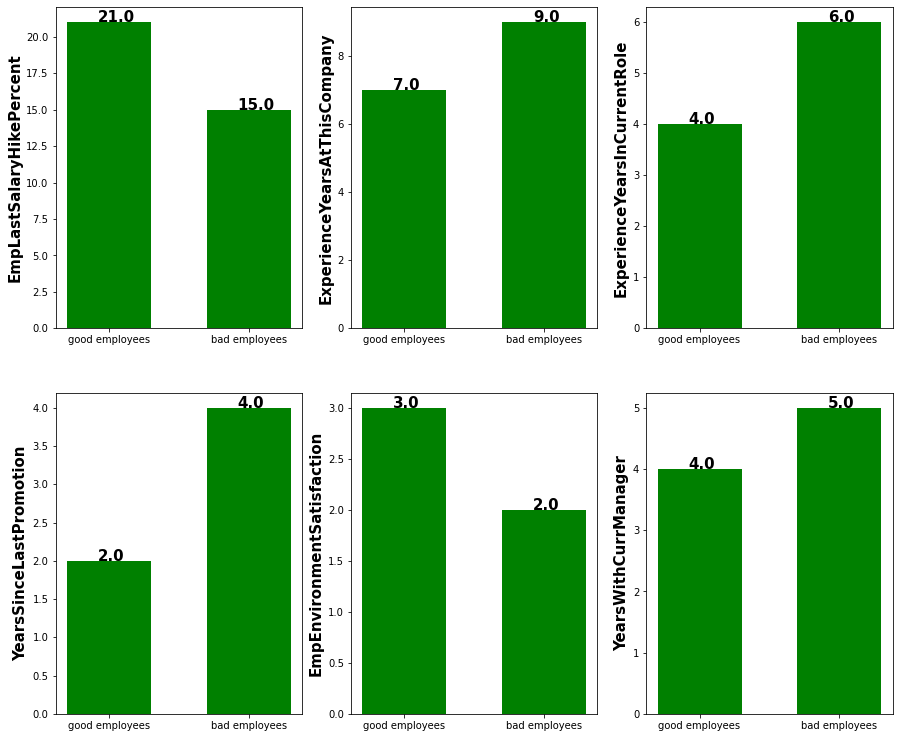

In [26]:
top_factors=['EmpLastSalaryHikePercent','ExperienceYearsAtThisCompany',
             'ExperienceYearsInCurrentRole',
             'YearsSinceLastPromotion','EmpEnvironmentSatisfaction',
            'YearsWithCurrManager']
a=list(range(1,7))
b=list(zip(top_factors,a))
plt.figure(figsize=(15,13))
for i,v in b:
    plt.subplot(2,3,v)
    plt.bar(['good employees','bad employees'],[np.round(good_employees[i].mean()),np.round(bad_employees[i].mean())],
            width=0.6,color='g')
    plt.ylabel(i,fontweight=1000,fontsize=15)
    for i,v in enumerate([np.round(good_employees[i].mean()),np.round(bad_employees[i].mean())]):
        plt.text(i-0.08,v,str(v),fontweight=1000,fontsize=15)
    

#### Results of Employee comparison
From the above bar graphs, the following conclusions can be made:
- Higher salary hike has resulted in better employee performance
- Employees with more experience in the company exhibit comapritively poor performance than their good performance               counterparts. This maybe due to lower satisfaction level of the experienced employees in their current role. This statement     is supported by the 'employee environment satisfaction' bar graph,indicating low level of satisfaction in poor performance     employees.
- Years since last promotion is indirectly proportional to the employee performance.



#### Recommendations made from employee comparison
Inorder to improve the employee performance, the following points can be considered by the authorities:
- Salary increment level can be optimized and made equal for all the employees
- Employees can be provided with more incentives and improved working environment inorder to elevate their job satisfaction       levels
- Frequency of promotions to employees can increased.



#### 3.6: Checking multicollinearity between predictor variables

<AxesSubplot:>

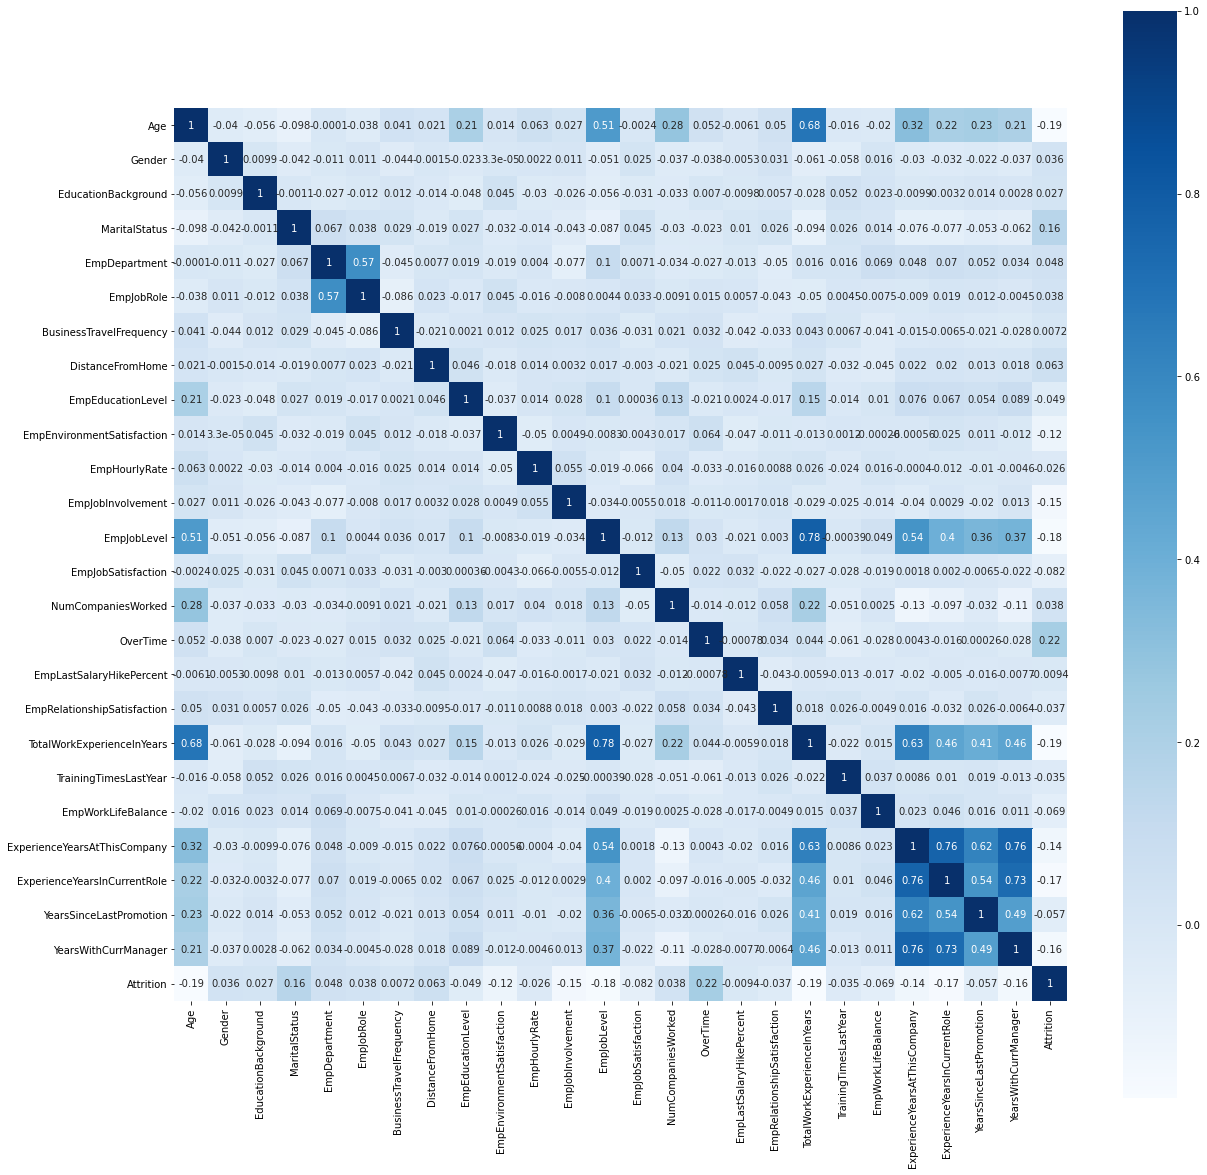

In [27]:
plt.figure(figsize=(20,20))
correlation=x.corr()
sns.heatmap(correlation,annot=True,square=True,cmap='Blues')

#### Results of multicollinearity analysis:
Majority of the factors exhibit low correlation level.
Moderate correlations(0.5 to 0.7) are observed between:
- Employee job level & Age
- Total work experience & Age
- Employee job level & Experience at this company
- Employee department & Employee job role
- Total work experience & Experience at this company
- Years since last promotion & Experience in current role
- Years since last promotion & experience in this company 
High correlations(0.7 to 0.9) are observed between:
- Total work experience & Employee job level
- Years with current manager & Experience at this company
- Experience in current role & Experience at this company
- Experience in current role & Years with current manager

Since there are no strong/very high correlations(0.9-1.0) between any of the features and the number of features are not too high to considerably increase the computational complexity, feature reduction can be avoided.

#### 3.7: Checking the imbalance in target variable values

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

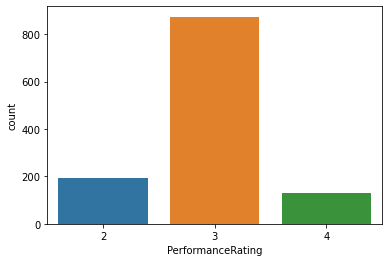

In [28]:
sns.countplot(y)

#### Results of imbalance check:
The target variable values provided in the dataset are imbalanced and is recommended to be equalized to avoid bias in the model. 

## STEP 4:
### Data pre-processing

#### Note:
- Important data pre-processing steps like splitting predictor and target variables and encoding of categorical variables has     already been done as a part of the exploratory data analysis

#### 4.1 Scaling the continuous variables

In [29]:
for i in x.columns:
    print('the unique values of',i,'are')
    print(x[i].unique())
    print(x[i].dtype)

the unique values of Age are
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
int64
the unique values of Gender are
[1. 0.]
float64
the unique values of EducationBackground are
[2. 1. 0. 3. 4. 5.]
float64
the unique values of MaritalStatus are
[2. 1. 0.]
float64
the unique values of EmpDepartment are
[5. 3. 1. 0. 4. 2.]
float64
the unique values of EmpJobRole are
[13.  8.  3. 14.  6. 15.  1. 16.  7. 10. 12.  5. 11.  9.  4. 17.  0. 18.
  2.]
float64
the unique values of BusinessTravelFrequency are
[2. 1. 0.]
float64
the unique values of DistanceFromHome are
[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
int64
the unique values of EmpEducationLevel are
[3 4 2 5 1]
int64
the unique values of EmpEnvironmentSatisfaction are
[4 2 1 3]
int64
the unique values of EmpHourlyRate are
[ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79 

In [30]:
scaler=MinMaxScaler()
scalable_variables=['YearsWithCurrManager',
                   'ExperienceYearsInCurrentRole',
                   'ExperienceYearsAtThisCompany',
                   'TotalWorkExperienceInYears',
                  'EmpLastSalaryHikePercent',
                  'EmpHourlyRate',
                  'DistanceFromHome',
                  'Age']
for i in scalable_variables:
    x[i]=scaler.fit_transform(x[[i]])

In [31]:
x.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.333333,1.0,2.0,2.0,5.0,13.0,2.0,0.321429,3,4,...,0.071429,4,0.250,2,2,0.250,0.388889,0,0.470588,0.0
1,0.690476,1.0,2.0,2.0,5.0,13.0,2.0,0.464286,4,4,...,0.071429,4,0.500,2,3,0.175,0.388889,1,0.411765,0.0
2,0.523810,1.0,1.0,1.0,5.0,13.0,1.0,0.142857,4,4,...,0.714286,3,0.500,2,3,0.450,0.722222,1,0.705882,0.0
3,0.547619,1.0,0.0,0.0,3.0,8.0,2.0,0.321429,4,2,...,0.285714,2,0.575,2,2,0.525,0.333333,12,0.352941,0.0
4,1.000000,1.0,2.0,2.0,5.0,13.0,2.0,0.535714,4,1,...,0.214286,4,0.250,1,3,0.050,0.111111,2,0.117647,0.0


#### 4.2: Splitting dataset into training and testing data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

#### 4.3: Adressing imbalance in data by using synthetic minority oversampling technique(SMOTE)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

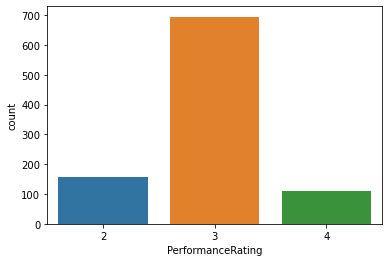

In [33]:
sns.countplot(y_train)

In [34]:
oversampler=SMOTE()
x_train,y_train=oversampler.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

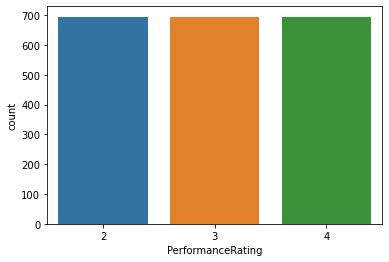

In [35]:
sns.countplot(y_train)

In [37]:
x.to_excel('final_data.xlsx')

In [38]:
y.to_excel('final_data2.xlsx')
x_train.to_excel('train.xlsx')
x_test.to_excel('test.xlsx')

## STEP 5: 
### Building Macine Learning models, Evaluating their performance, and selecting the best one

#### 5.1: Defining the available classification models

In [36]:
logr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3)
forest=RandomForestClassifier(max_depth=2)
adab=AdaBoostClassifier()
xgb=XGBClassifier(max_depth=2)

#### 5.2: Training the models

In [37]:
logr.fit(x_train,y_train)

LogisticRegression()

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=2)

In [40]:
adab.fit(x_train,y_train)

AdaBoostClassifier()

In [41]:
xgb.fit(x_train,y_train)

[22:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### 5.3: Evaluating model performances

In [42]:
model_list=[logr,knn,forest,adab,xgb]
model_accuracies=[]
for i in model_list:
    print('accuracy score for',i,'model is')
    print(accuracy_score(y_true=y_test,y_pred=i.predict(x_test.values)))
    model_accuracies.append(accuracy_score(y_true=y_test,y_pred=i.predict(x_test.values)))

accuracy score for LogisticRegression() model is
0.725
accuracy score for KNeighborsClassifier(n_neighbors=3) model is
0.5
accuracy score for RandomForestClassifier(max_depth=2) model is
0.8875
accuracy score for AdaBoostClassifier() model is
0.7166666666666667
accuracy score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is
0.9333333333333333


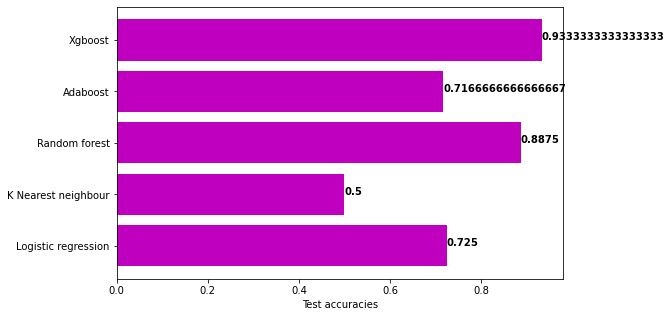

In [59]:
models=['Logistic regression','K Nearest neighbour','Random forest','Adaboost','Xgboost']
plt.figure(figsize=(8,5))
plt.barh(models,model_accuracies,color='m')
plt.xlabel('Test accuracies')
for i,v in enumerate(model_accuracies):
    plt.text(v,i,str(v),fontweight=1000)

#### Model performance evaluation results:
From the output obtained in last cell, it is clear that the XGBClassifier(extreme grandient boosting classification) is the most effective machine learning model for the given task.

#### 5.4: Hyperparameter tuning of XGBClassifier

In [54]:
parameters={'max_depth':[2,3,4,5,6],'n_estimators':[250,550,750,1000,1500,2000],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6]}
model=XGBClassifier()
hp_tuner=RandomizedSearchCV(model,parameters,cv=3)

In [55]:
hp_tuner.fit(x,y)

[22:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

#### 5.5: Obtaining the model with best combination of parameters

In [56]:
hp_tuner.best_params_

{'n_estimators': 550, 'max_depth': 5, 'learning_rate': 0.1}

In [58]:
model=hp_tuner.best_estimator_

## STEP 6:
### Testing the Best model

In [59]:
predictions=model.predict(x_test)

In [60]:
accuracy_score(y_true=y_test,y_pred=predictions)

1.0

## STEP 7:
### Saving the best model

In [ ]:
joblib.dump(model,'Employee_performance_model(INX_Future_inc)')

## PROJECT SUMMARY

The objectives of this project included:
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees.
4. Recommendations to improve the employee performance based on insights from analysis.

Exploratory data analysis of the given dataset was carried out in first part of the project to understand the current employee data provided and to gain useful insights.

- The dataset was complete without any null values.
- Information regarding department wise employee performances was obtained by calculating the average employee performance and   plotting a bar chart(matplotlib) of the same.
- Feature importances were delineated by calculating the chi-squared statistic(scikit learn), which indicates the dependance of   the feature     to the target variable.
- To understand the root cause of the performance issue, The high and low performance employees were compared with their         average values for the top 6 important features. From the insights obtained from this, appropriate recommendations were made.
- Multicollinearity was checked by plotting a heatmap(seaborn) and no strong/ very high correlations were observed.
- Imbalance in target variable values were determined using a countplot(seaborn) and an imbalance was present.

In the next part, data pre-processing was done to prepare the data for training and testing the machine learning models.

- Important data pre-processing steps like splitting predictor and target variables and encoding of categorical variables(using   OrdinalEncoder from scikit learn) was already done as a part of the exploratory data analysis.
- The continuous variables were scaled using the MinMaxscaler (scikit learn) to convert the data points into values in between
  0 and 1.
- Data was split in to training and testing data (scikit learn).
- Target variable imbalance in the data was addressed by using synthetic minority oversampling technique(SMOTE) (imblearn).

The next step was to choose a suitable machine learning model for the problem in hand. For this, the availabe machine learning algorithms for multi-class classification were tried out to check their accuracies in classifying the data points into 1 of the 3 performance classes.

- XGBoost algorithm poved to have the best accuracy(93.33%) and it was employed for the project.
- Hyperparameter tuning oF XGBoost algorith was carried out using RandomizedSearchCV (scikit learn) function to obtain the model with best       parameter combination.
- The best model gave a test accuracy of 100% and it was saved for deployment using the joblib package.